# AQI Data - Exploratory Data Analysis

This notebook performs exploratory data analysis on the AQI and weather data to understand patterns, correlations, and prepare for predictive modeling.

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from ..conifg import get_dataset

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

ImportError: attempted relative import with no known parent package

## Load Data

In [10]:
# Load the dataset
df = pd.read_csv('../backup/datav3.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

Dataset shape: (216, 19)

Columns: ['timestamp ', ' year', ' month', ' day', ' hour', ' epa_aqi', ' pm2_5 ', ' pm10  ', ' co    ', ' no2 ', ' so2  ', ' o3    ', ' temp_c', ' humidity_pct', ' pressure_hpa', ' wind_speed_kmh', ' wind_dir_deg', ' rain_mm', ' solar_rad_wm2']


## Basic Data Overview

In [ ]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,timestamp,year,month,day,hour,epa_aqi,pm2_5,pm10,co,no2,so2,o3,temp_c,humidity_pct,pressure_hpa,wind_speed_kmh,wind_dir_deg,rain_mm,solar_rad_wm2
0,1760382000,2025,10,14,0,3,30.06,76.43,132.01,0.13,1.12,102.17,25.0,78,1012.4,7.7,309,0.0,0.0
1,1760385600,2025,10,14,1,3,30.02,75.86,132.20,0.12,1.08,102.21,24.4,80,1011.9,7.8,328,0.0,0.0
2,1760389200,2025,10,14,2,3,29.89,75.19,132.14,0.11,1.05,102.36,24.2,80,1011.7,8.0,329,0.0,0.0
3,1760392800,2025,10,14,3,3,29.69,74.42,132.16,0.11,1.03,103.03,24.1,79,1011.2,8.6,324,0.0,0.0
4,1760396400,2025,10,14,4,3,29.34,72.96,131.86,0.11,1.03,104.51,23.9,81,1011.0,9.5,333,0.0,0.0


In [ ]:
# Data types and non-null counts
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       2448 non-null   int64  
 1   year            2448 non-null   int64  
 2   month           2448 non-null   int64  
 3   day             2448 non-null   int64  
 4   hour            2448 non-null   int64  
 5   epa_aqi         2448 non-null   int64  
 6   pm2_5           2448 non-null   float64
 7   pm10            2448 non-null   float64
 8   co              2448 non-null   float64
 9   no2             2448 non-null   float64
 10  so2             2448 non-null   float64
 11  o3              2448 non-null   float64
 12  temp_c          2448 non-null   float64
 13  humidity_pct    2448 non-null   int64  
 14  pressure_hpa    2448 non-null   float64
 15  wind_speed_kmh  2448 non-null   float64
 16  wind_dir_deg    2448 non-null   int64  
 17  rain_mm         2448 n

In [ ]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,timestamp,year,month,day,hour,epa_aqi,pm2_5,pm10,co,no2,so2,o3,temp_c,humidity_pct,pressure_hpa,wind_speed_kmh,wind_dir_deg,rain_mm,solar_rad_wm2
count,2.448000e+03,2448.00000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000
mean,1.764806e+09,2025.22549,8.872549,16.321078,11.500000,3.695670,55.518023,108.598243,245.017132,0.970846,5.799109,124.922949,23.041993,48.837418,1015.491258,8.090074,158.206291,0.006658,138.841503
std,2.570615e+06,0.41799,4.302433,8.400908,6.923601,0.887242,40.256979,65.519563,128.982524,0.930731,4.658628,22.588800,5.134724,20.897196,3.589265,3.534482,125.092552,0.179680,203.903701
min,1.760382e+09,2025.00000,1.000000,1.000000,0.000000,2.000000,3.600000,11.460000,87.190000,0.020000,0.070000,77.400000,9.200000,7.000000,1006.600000,0.400000,1.000000,0.000000,0.000000
25%,1.762584e+09,2025.00000,10.000000,9.000000,5.750000,3.000000,26.922500,64.995000,132.370000,0.160000,0.747500,106.187500,19.300000,32.000000,1012.800000,5.700000,39.000000,0.000000,0.000000
50%,1.764787e+09,2025.00000,11.000000,17.000000,11.500000,4.000000,48.140000,96.550000,230.455000,0.720000,6.190000,123.795000,22.800000,47.000000,1016.000000,7.900000,117.500000,0.000000,0.000000
75%,1.766989e+09,2025.00000,12.000000,23.000000,17.250000,4.000000,70.462500,136.375000,308.415000,1.530000,9.212500,139.675000,26.500000,64.000000,1018.100000,10.200000,279.000000,0.000000,269.250000
max,1.769278e+09,2026.00000,12.000000,31.000000,23.000000,5.000000,262.000000,414.470000,824.500000,6.950000,23.330000,208.980000,36.500000,99.000000,1025.200000,23.800000,360.000000,7.400000,675.000000


## Missing Values Analysis

In [11]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print("Missing Values:")
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
if missing_df['Missing Count'].sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_df[missing_df['Missing Count'] > 0]['Percentage'].plot(kind='barh')
    plt.xlabel('Percentage Missing (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found!")

Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

No missing values found!


## Target Variable Analysis (EPA AQI)

AQI Value Counts:
epa_aqi
2    162
3    963
4    781
5    542
Name: count, dtype: int64


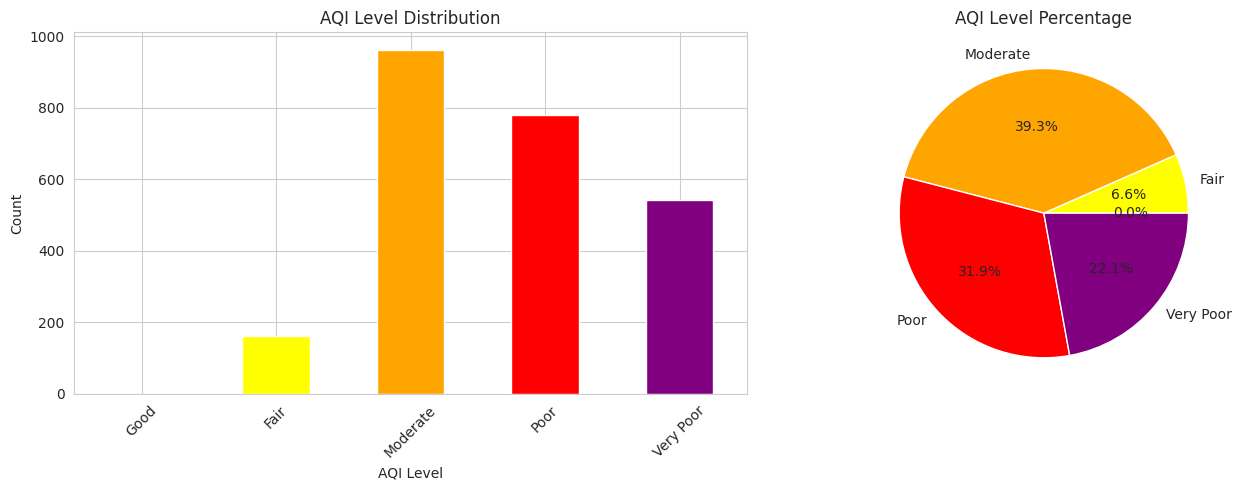

In [ ]:
# AQI distribution
print("AQI Value Counts:")
print(df['epa_aqi'].value_counts().sort_index())

# AQI levels mapping (EPA standard)
aqi_levels = {
    1: 'Good',
    2: 'Fair',
    3: 'Moderate',
    4: 'Poor',
    5: 'Very Poor'
}

df['aqi_level'] = df['epa_aqi'].map(aqi_levels)

# Visualize AQI distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
aqi_counts = df['aqi_level'].value_counts().reindex(['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor'])
aqi_counts.plot(kind='bar', ax=axes[0], color=['green', 'yellow', 'orange', 'red', 'purple'])
axes[0].set_title('AQI Level Distribution')
axes[0].set_xlabel('AQI Level')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
aqi_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                colors=['green', 'yellow', 'orange', 'red', 'purple'])
axes[1].set_title('AQI Level Percentage')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## Time Series Analysis

In [ ]:
# Create datetime column
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.sort_values('datetime')

print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Total duration: {(df['datetime'].max() - df['datetime'].min()).days} days")

Date range: 2025-10-13 19:00:00 to 2026-01-24 18:00:00
Total duration: 102 days


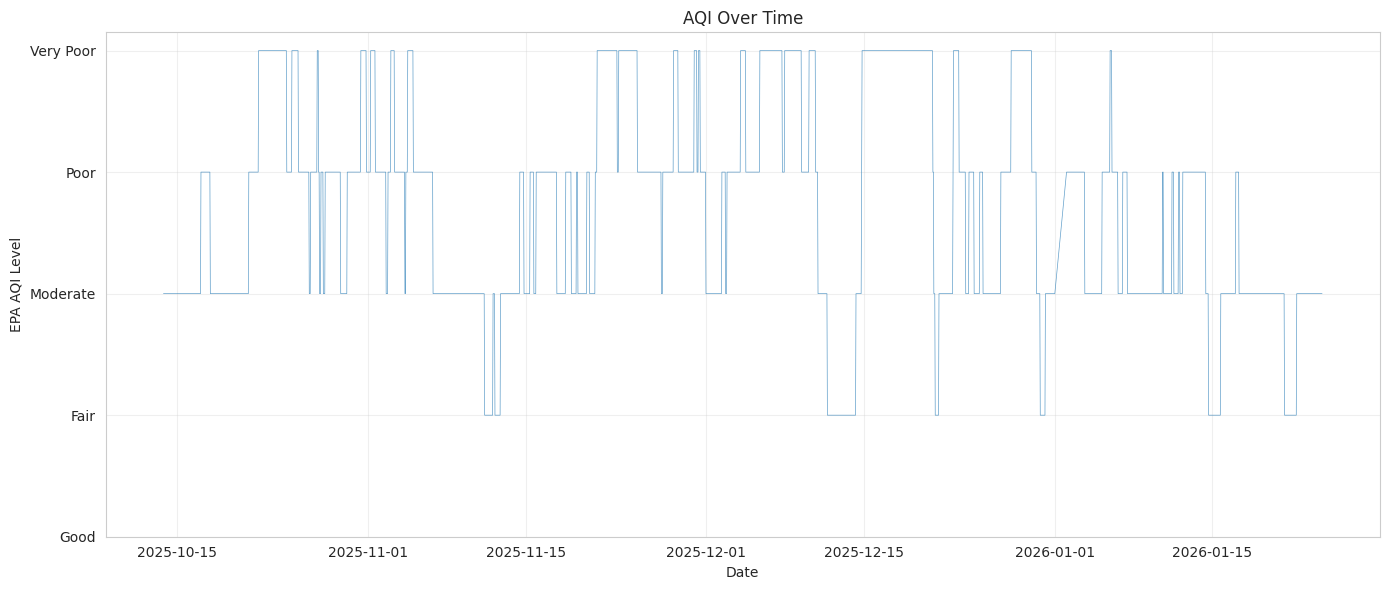

In [ ]:
# Plot AQI over time
plt.figure(figsize=(14, 6))
plt.plot(df['datetime'], df['epa_aqi'], alpha=0.7, linewidth=0.5)
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('EPA AQI Level')
plt.yticks([1, 2, 3, 4, 5], ['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

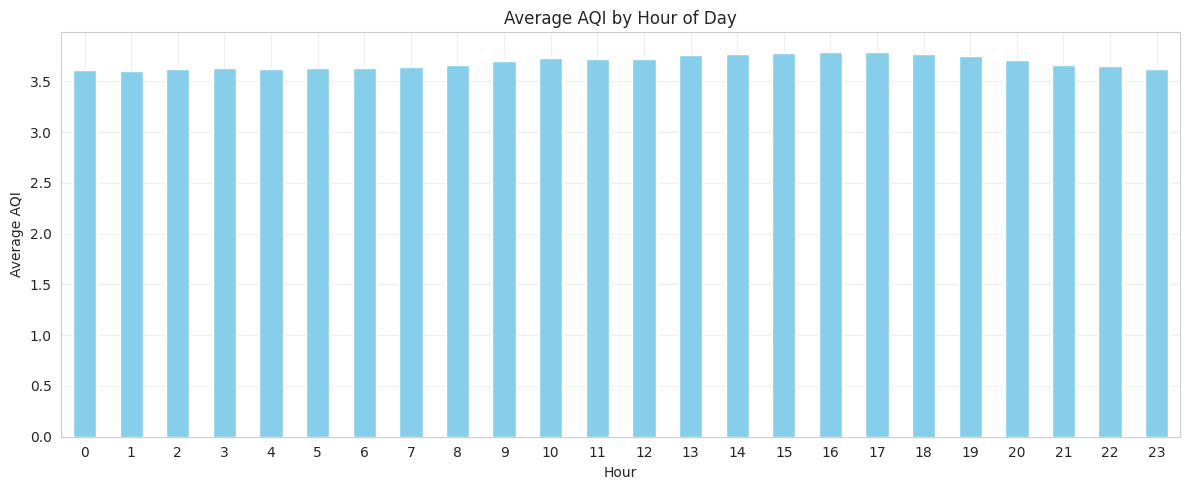

In [ ]:
# Hourly pattern
hourly_aqi = df.groupby('hour')['epa_aqi'].mean()

plt.figure(figsize=(12, 5))
hourly_aqi.plot(kind='bar', color='skyblue')
plt.title('Average AQI by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

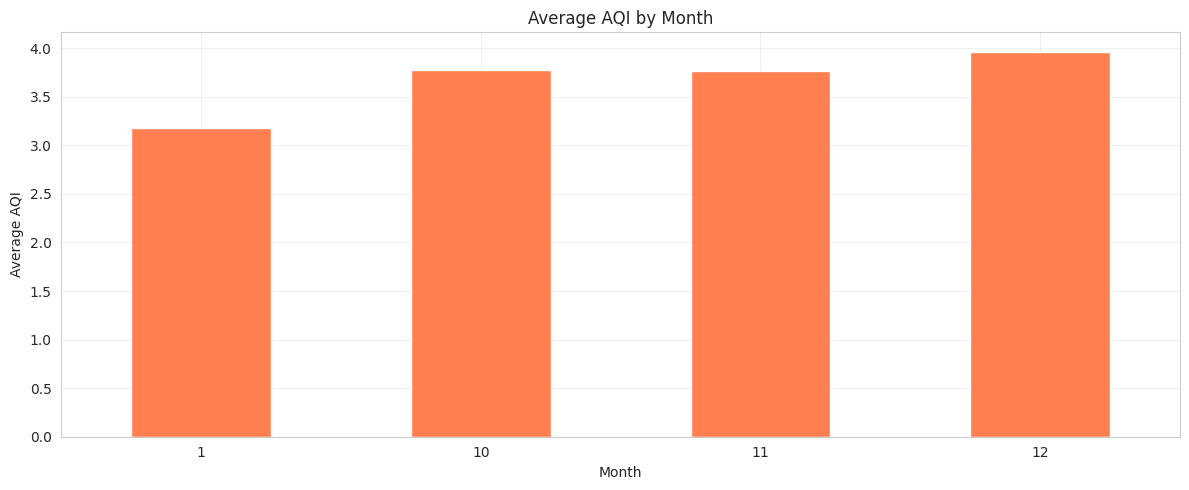

In [ ]:
# Monthly pattern
monthly_aqi = df.groupby('month')['epa_aqi'].mean()

plt.figure(figsize=(12, 5))
monthly_aqi.plot(kind='bar', color='coral')
plt.title('Average AQI by Month')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Pollutant Analysis

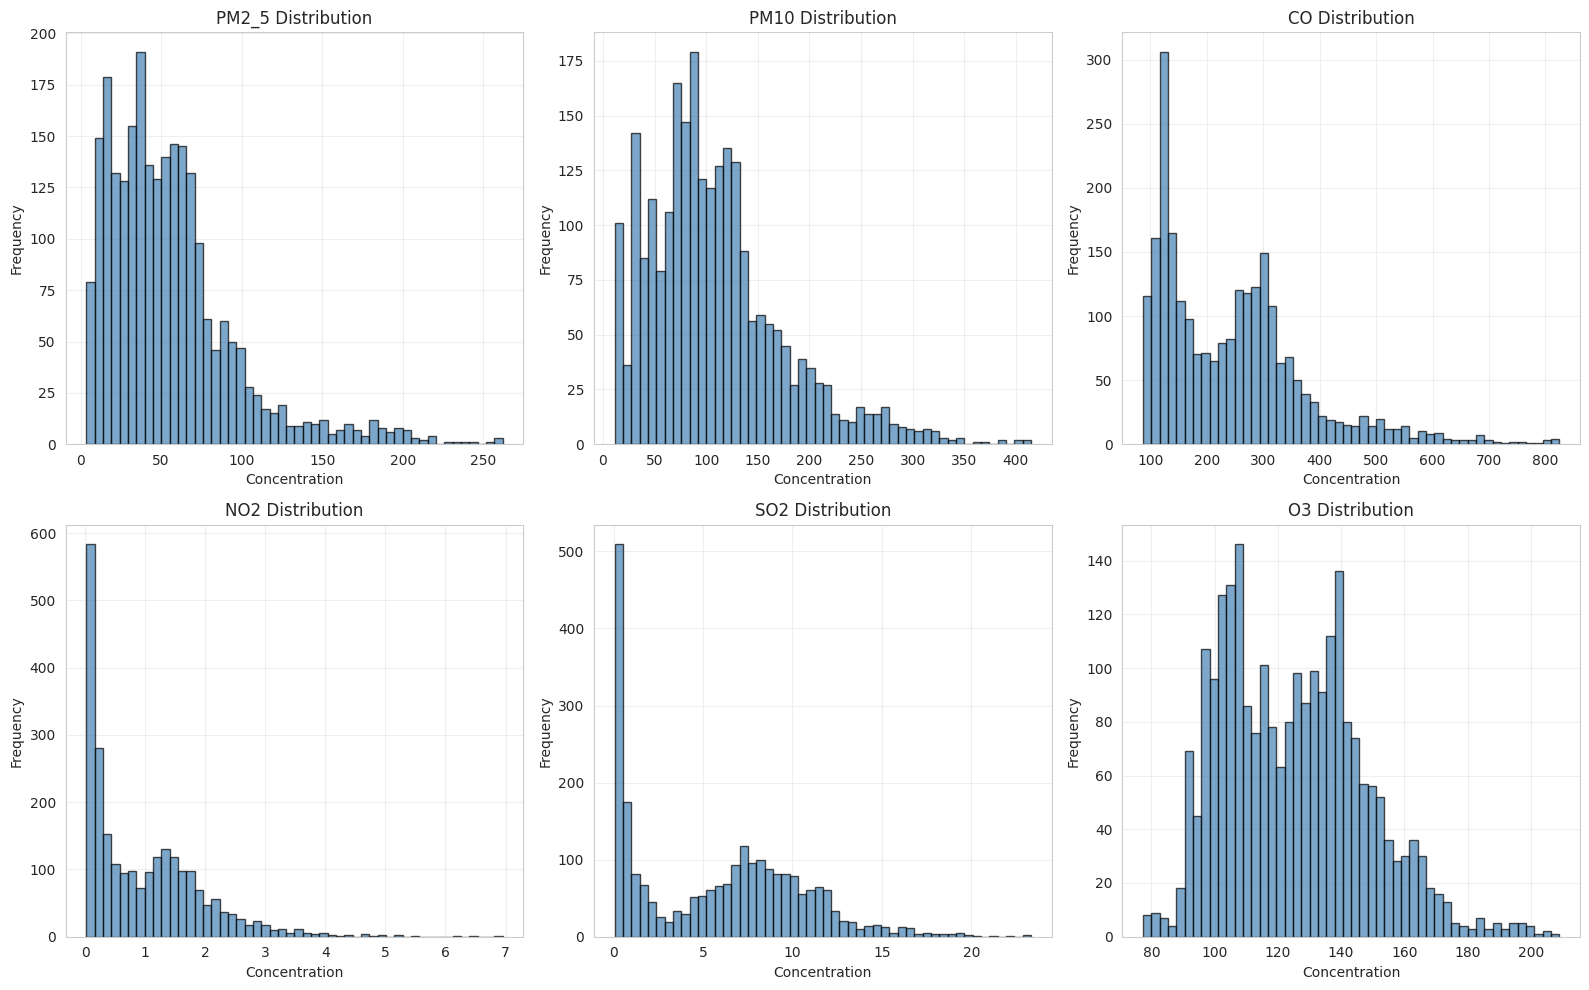

In [ ]:
# Pollutant columns
pollutants = ['pm2_5', 'pm10', 'co', 'no2', 'so2', 'o3']

# Distribution of pollutants
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    axes[i].hist(df[pollutant].dropna(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{pollutant.upper()} Distribution')
    axes[i].set_xlabel('Concentration')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

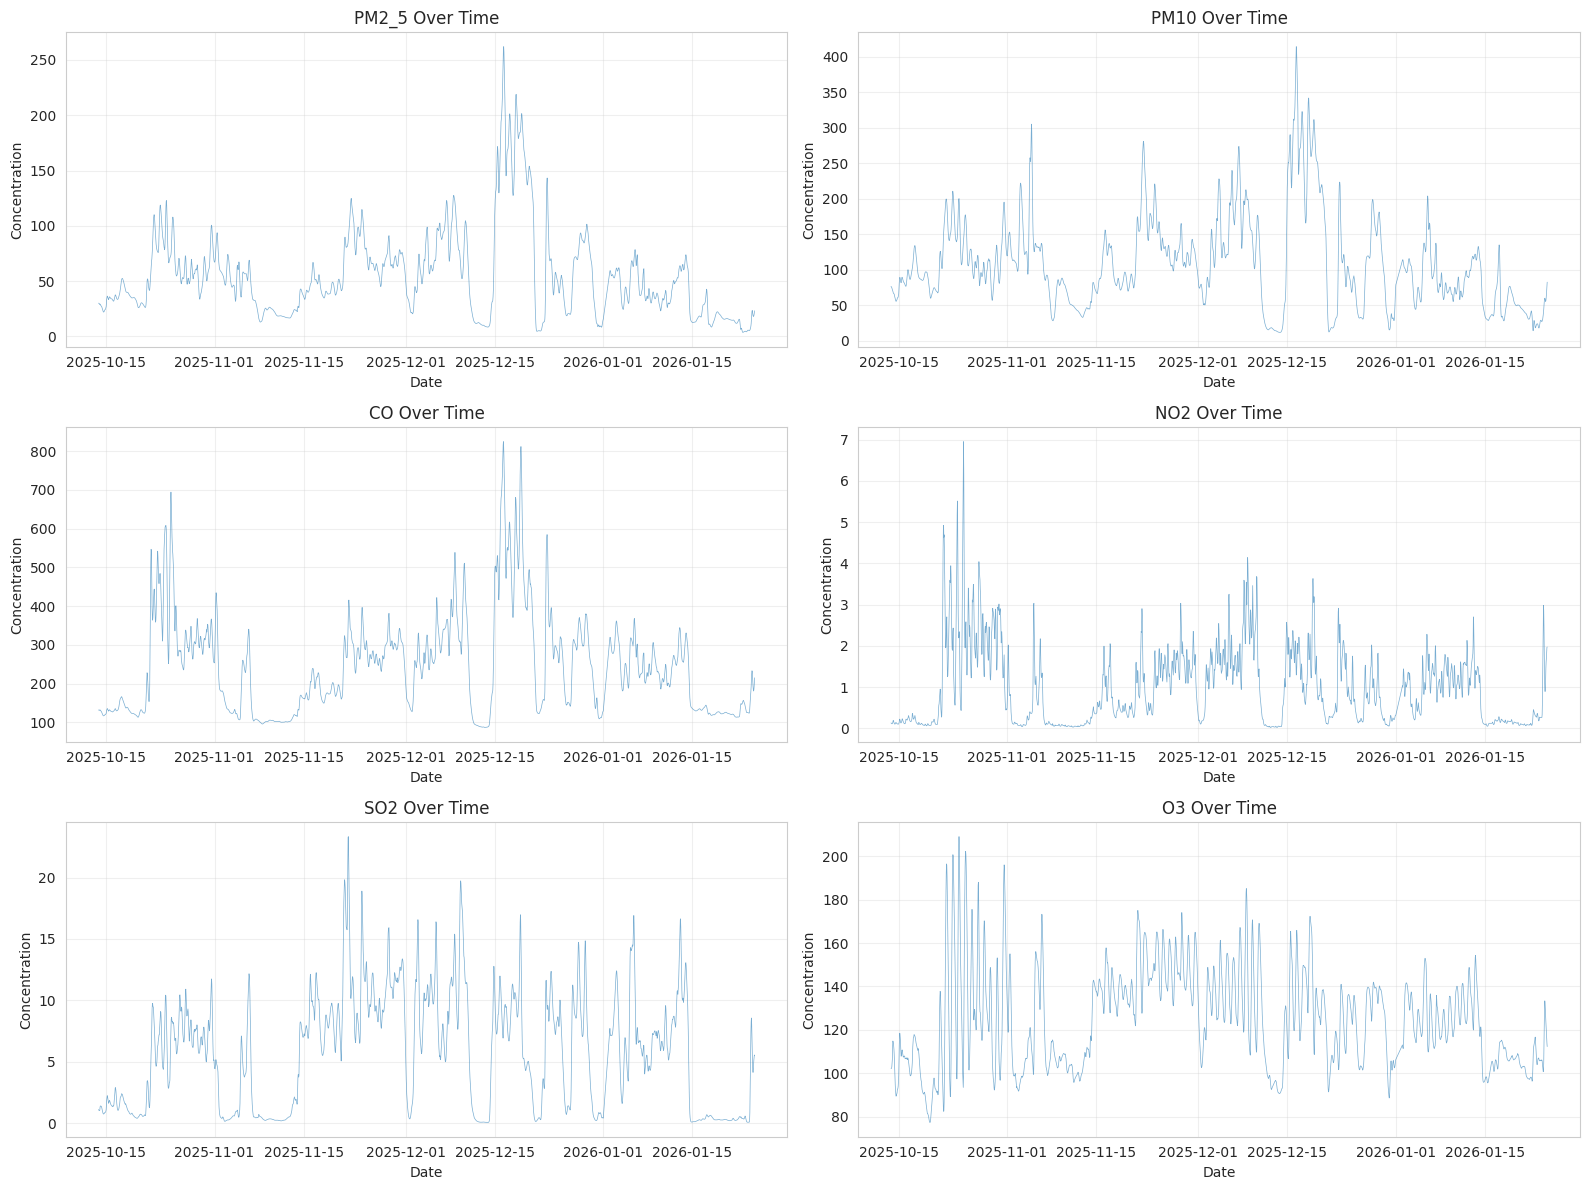

In [ ]:
# Pollutants over time
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    axes[i].plot(df['datetime'], df[pollutant], alpha=0.6, linewidth=0.5)
    axes[i].set_title(f'{pollutant.upper()} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Concentration')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Weather Variables Analysis

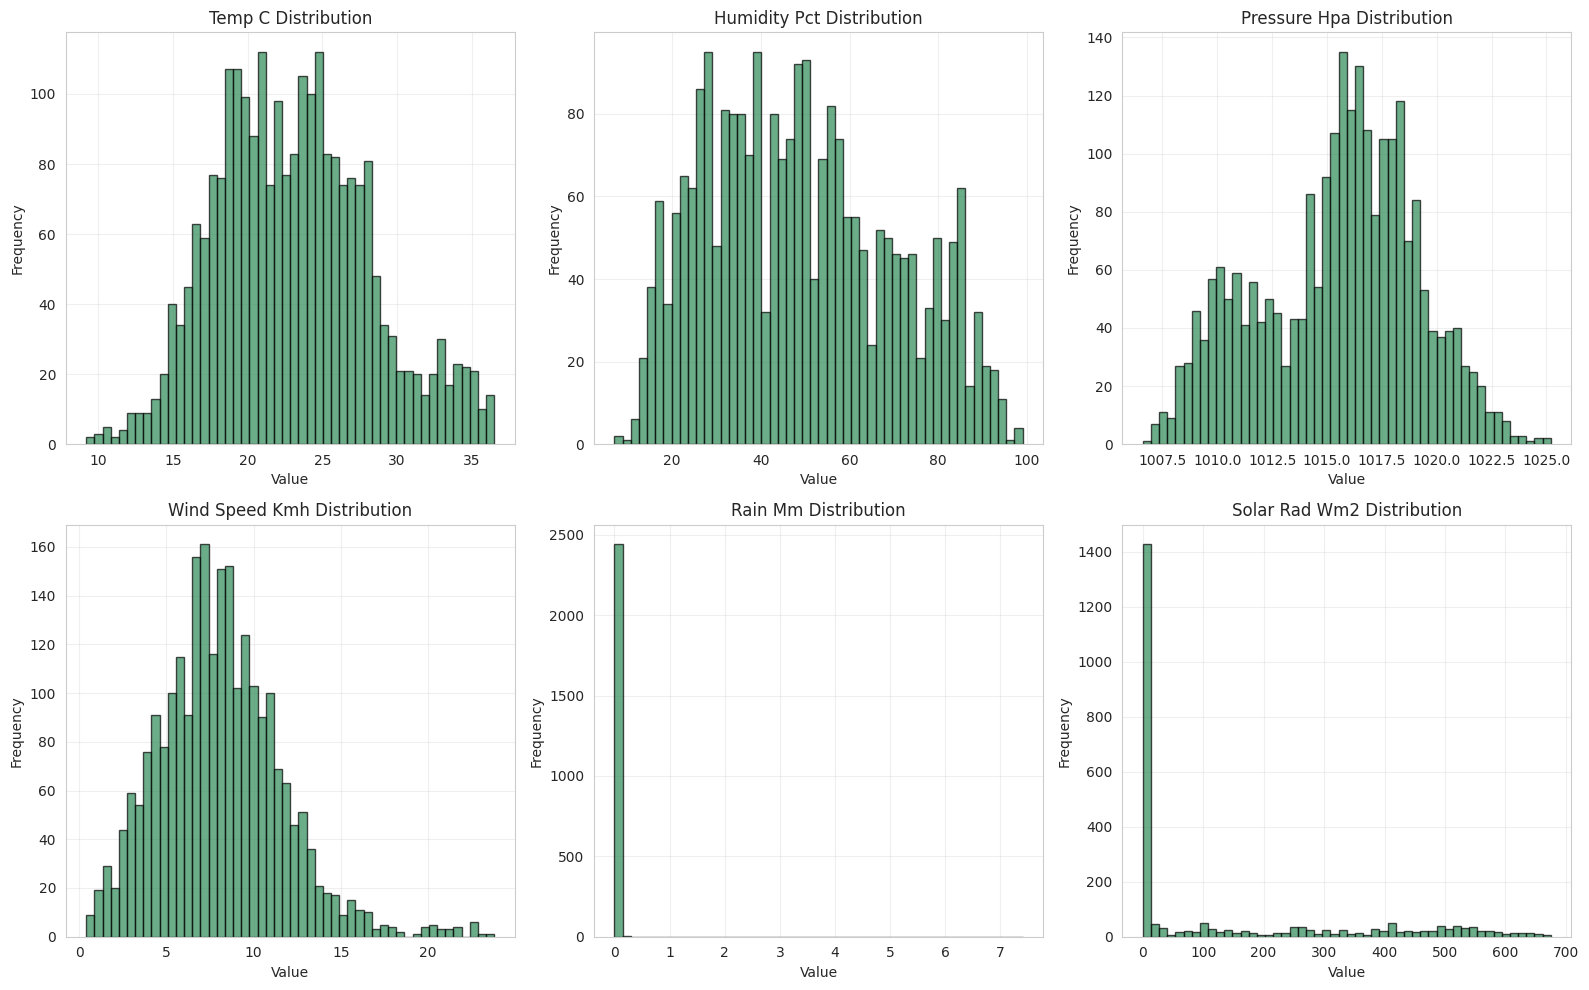

In [ ]:
# Weather columns
weather_vars = ['temp_c', 'humidity_pct', 'pressure_hpa', 'wind_speed_kmh', 'rain_mm', 'solar_rad_wm2']

# Distribution of weather variables
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, var in enumerate(weather_vars):
    if df[var].notna().sum() > 0:
        axes[i].hist(df[var].dropna(), bins=50, color='seagreen', alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{var.replace("_", " ").title()} Distribution')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

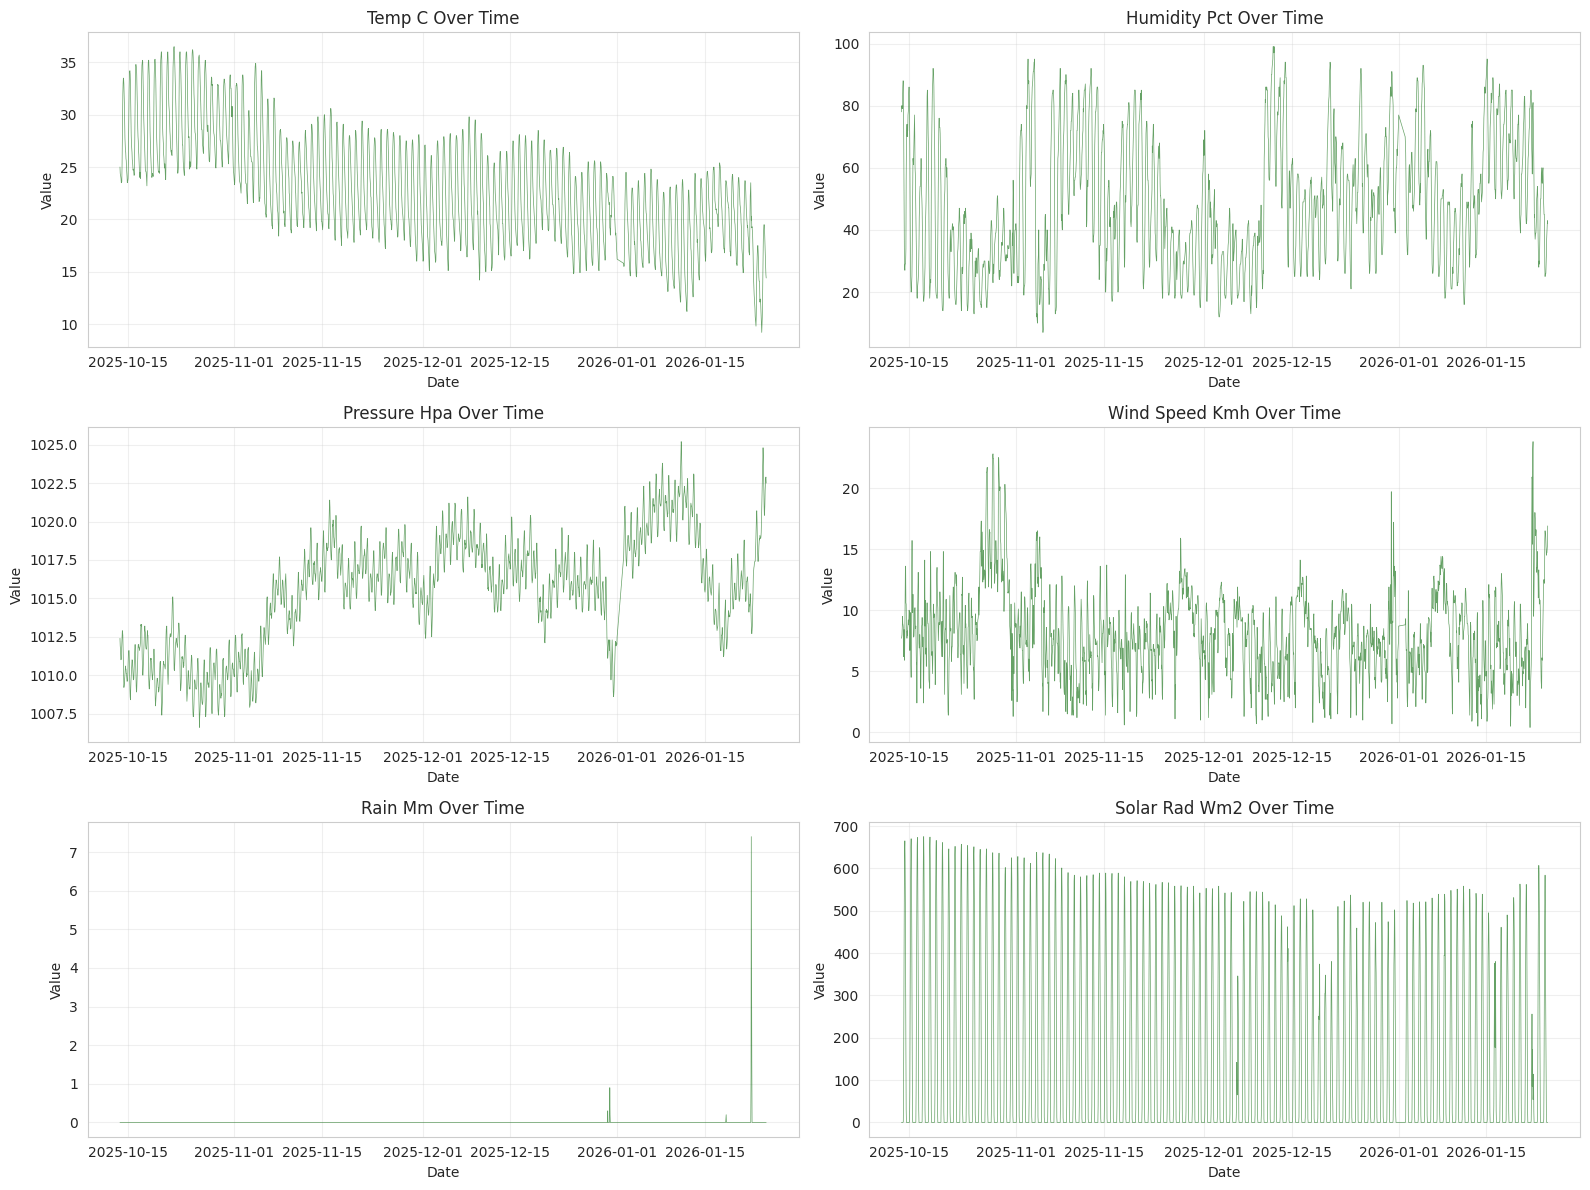

In [ ]:
# Weather variables over time
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

for i, var in enumerate(weather_vars):
    if df[var].notna().sum() > 0:
        axes[i].plot(df['datetime'], df[var], alpha=0.6, linewidth=0.5, color='darkgreen')
        axes[i].set_title(f'{var.replace("_", " ").title()} Over Time')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Value')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Correlation Analysis

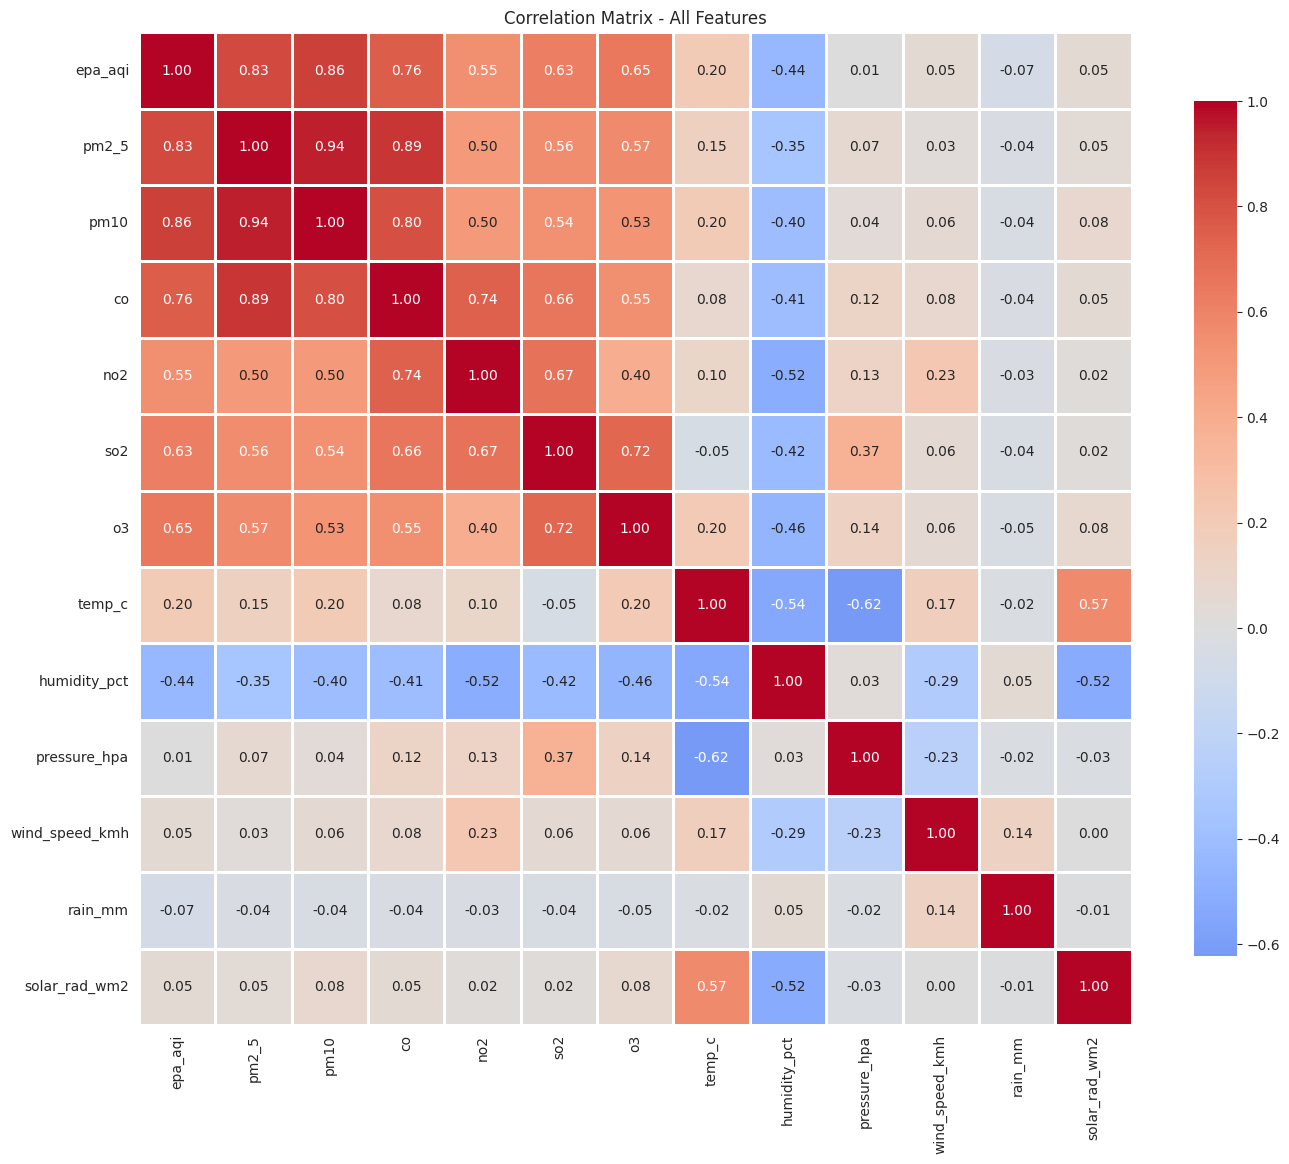

In [ ]:
# Select numeric columns for correlation
numeric_cols = ['epa_aqi', 'pm2_5', 'pm10', 'co', 'no2', 'so2', 'o3',
                'temp_c', 'humidity_pct', 'pressure_hpa', 'wind_speed_kmh', 'rain_mm', 'solar_rad_wm2']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Features')
plt.tight_layout()
plt.show()

Correlation with EPA AQI:
epa_aqi           1.000000
pm10              0.856545
pm2_5             0.825965
co                0.762131
o3                0.649402
so2               0.625822
no2               0.546867
temp_c            0.199902
wind_speed_kmh    0.053613
solar_rad_wm2     0.050821
pressure_hpa      0.010598
rain_mm          -0.069314
humidity_pct     -0.443803
Name: epa_aqi, dtype: float64


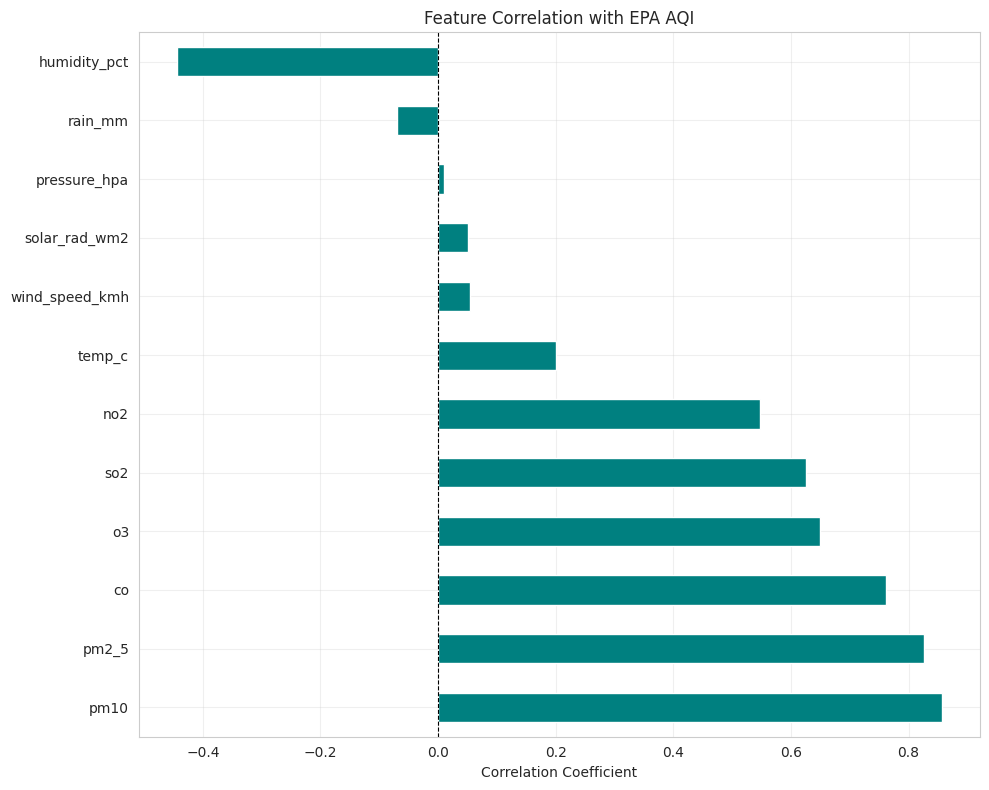

In [ ]:
# Correlation with AQI (target variable)
aqi_corr = corr_matrix['epa_aqi'].sort_values(ascending=False)
print("Correlation with EPA AQI:")
print(aqi_corr)

# Visualize
plt.figure(figsize=(10, 8))
aqi_corr[1:].plot(kind='barh', color='teal')
plt.title('Feature Correlation with EPA AQI')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Relationship between Pollutants and AQI

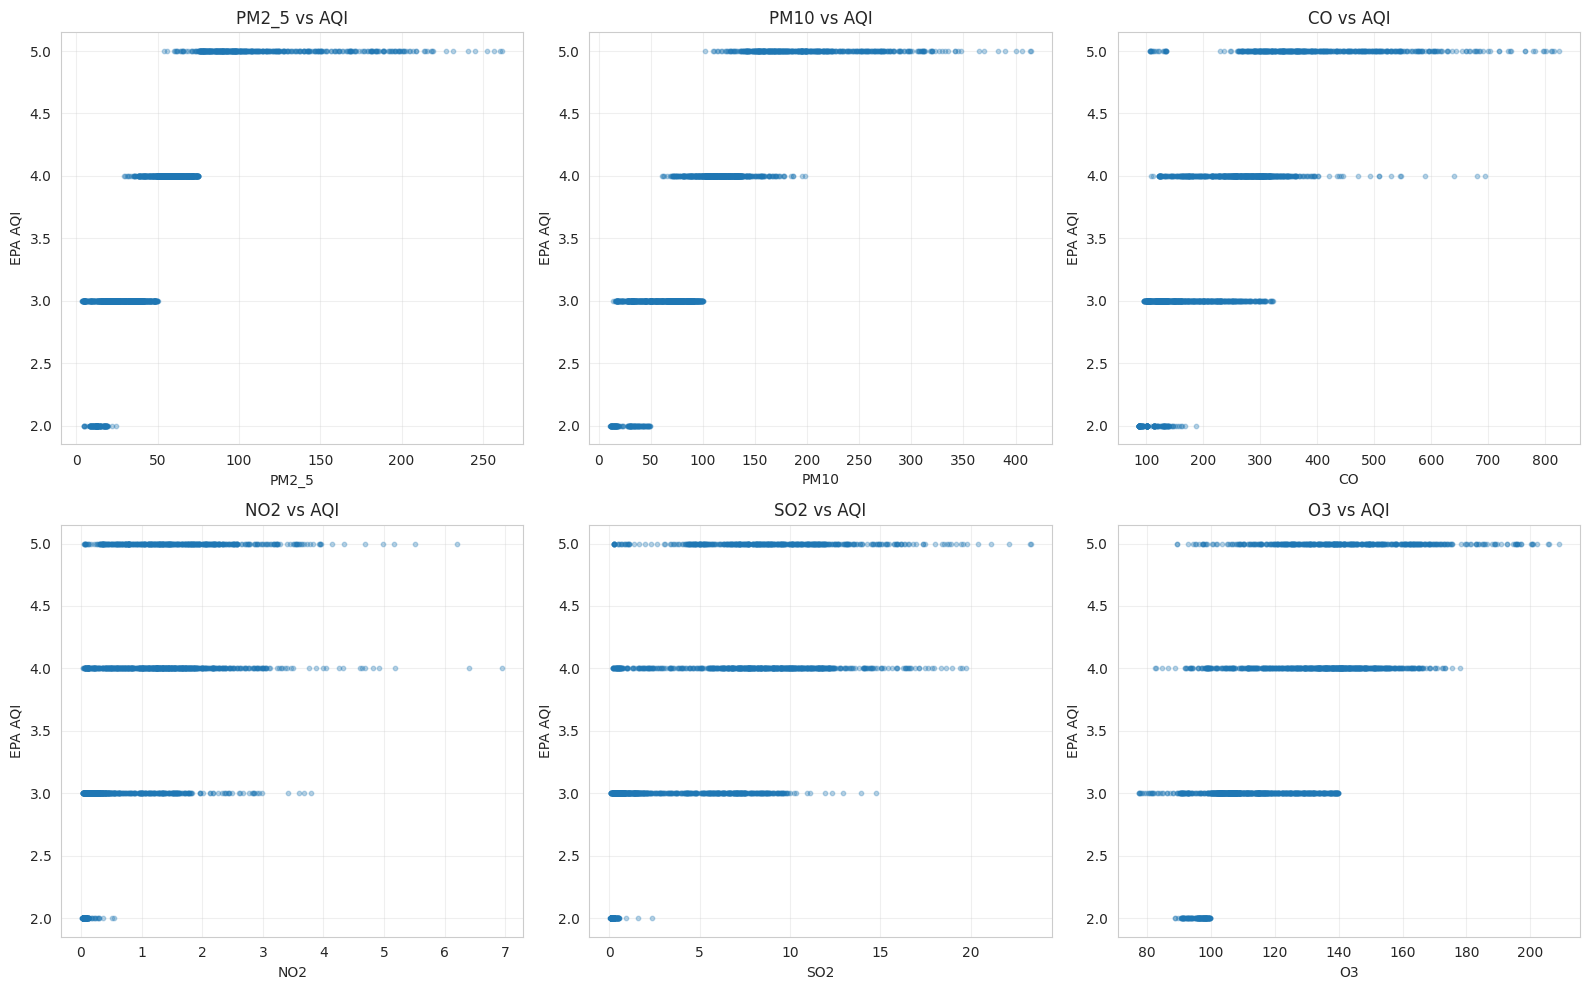

In [ ]:
# Scatter plots: Pollutants vs AQI
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    axes[i].scatter(df[pollutant], df['epa_aqi'], alpha=0.3, s=10)
    axes[i].set_xlabel(f'{pollutant.upper()}')
    axes[i].set_ylabel('EPA AQI')
    axes[i].set_title(f'{pollutant.upper()} vs AQI')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Relationship between Weather and AQI

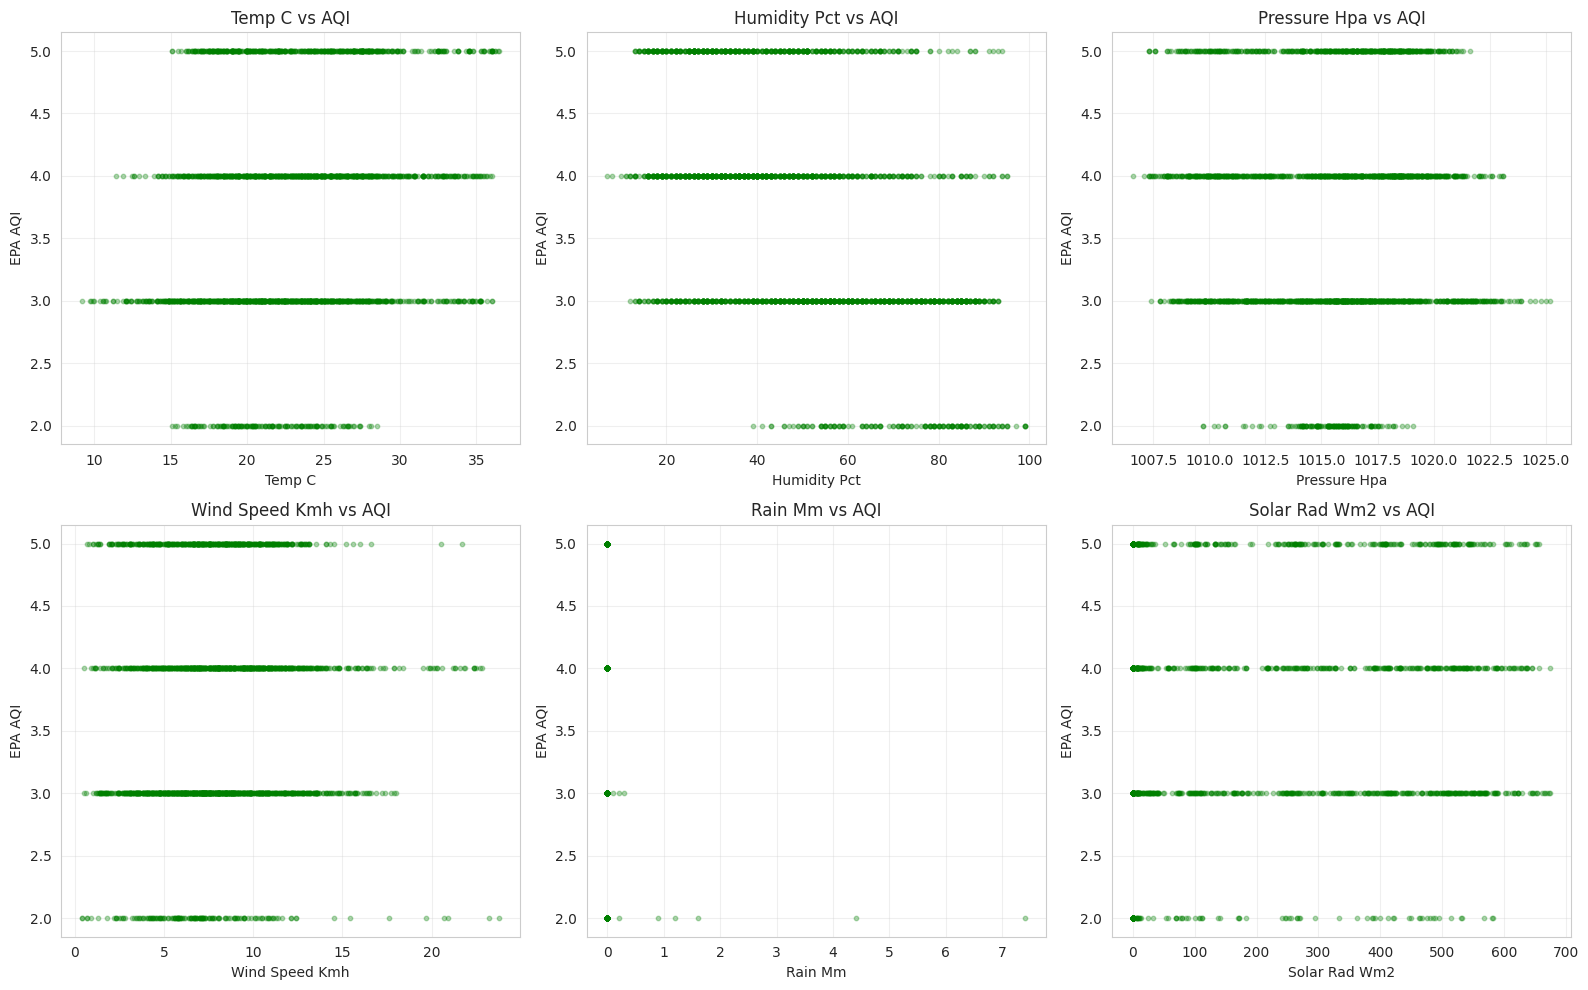

In [ ]:
# Scatter plots: Weather vs AQI
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, var in enumerate(weather_vars):
    if df[var].notna().sum() > 0:
        axes[i].scatter(df[var], df['epa_aqi'], alpha=0.3, s=10, color='green')
        axes[i].set_xlabel(f'{var.replace("_", " ").title()}')
        axes[i].set_ylabel('EPA AQI')
        axes[i].set_title(f'{var.replace("_", " ").title()} vs AQI')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Box Plots - Pollutants by AQI Level

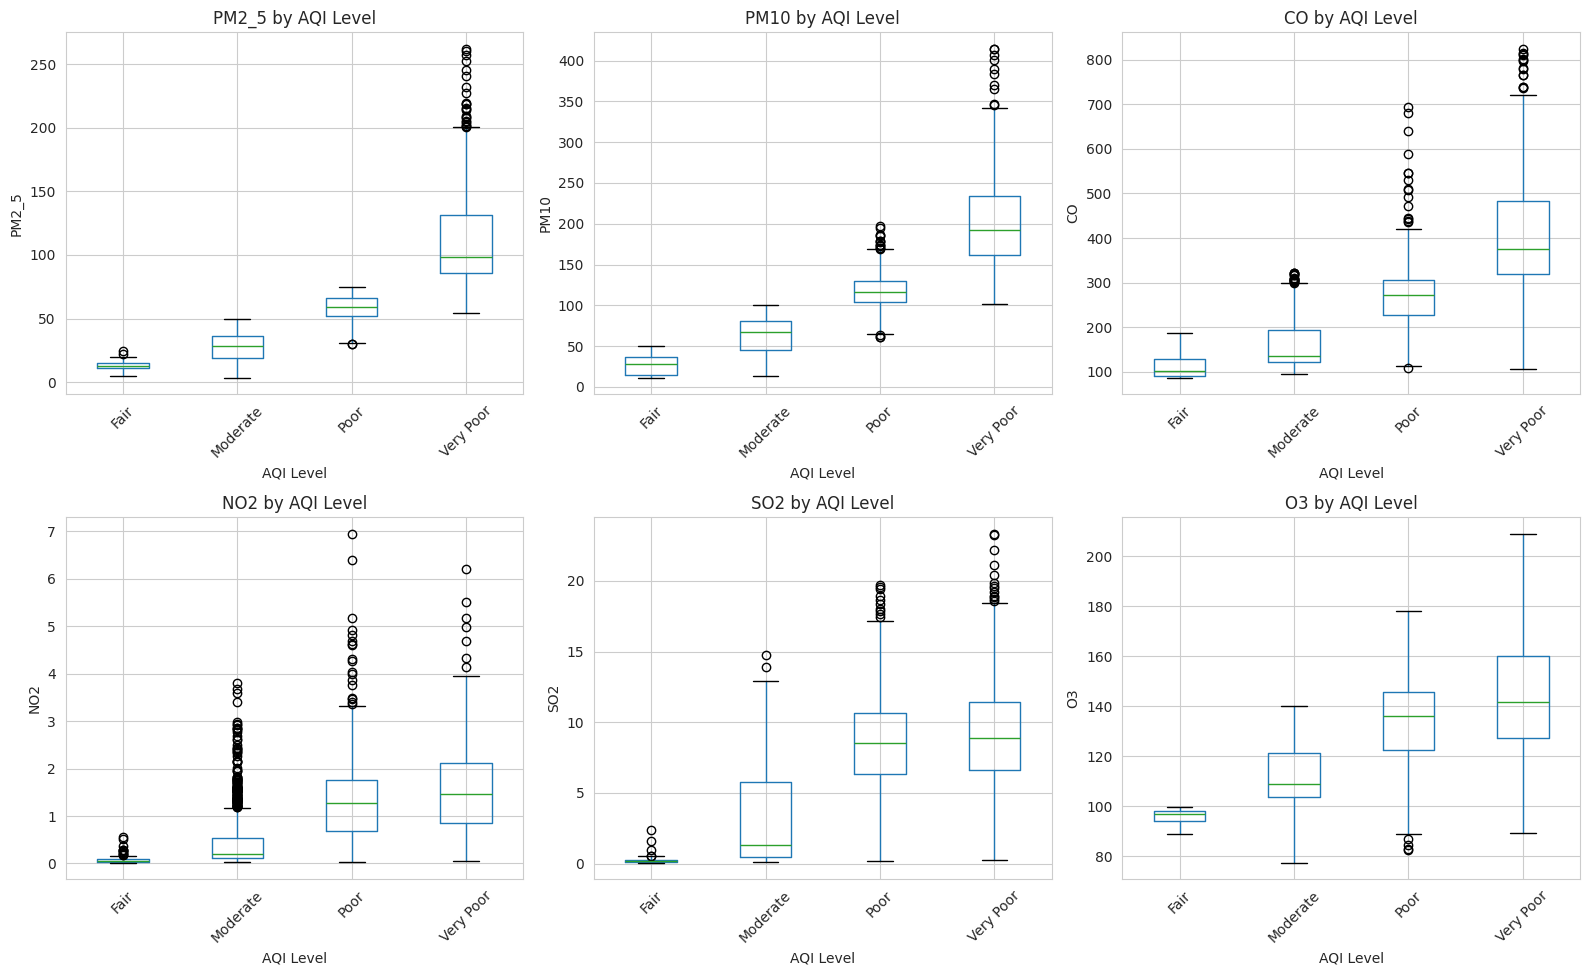

In [ ]:
# Box plots for each pollutant by AQI level
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    df.boxplot(column=pollutant, by='aqi_level', ax=axes[i])
    axes[i].set_title(f'{pollutant.upper()} by AQI Level')
    axes[i].set_xlabel('AQI Level')
    axes[i].set_ylabel(pollutant.upper())
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('')
plt.tight_layout()
plt.show()

## Statistical Summary by AQI Level

In [ ]:
# Group by AQI level and calculate mean values
aqi_summary = df.groupby('aqi_level')[pollutants + weather_vars].mean()
print("Mean Values by AQI Level:")
print(aqi_summary)

Mean Values by AQI Level:
                pm2_5        pm10          co       no2       so2          o3  \
aqi_level                                                                       
Fair        12.981358   26.533827  110.437716  0.079198  0.244321   96.031358   
Moderate    27.668609   62.860550  159.635711  0.475919  2.936719  112.127061   
Poor        58.233086  116.449718  266.053675  1.331306  8.209949  133.678592   
Very Poor  113.801162  203.077638  406.630849  1.597306  9.071236  143.677048   

              temp_c  humidity_pct  pressure_hpa  wind_speed_kmh   rain_mm  \
aqi_level                                                                    
Fair       21.380247     73.648148   1015.347531        7.159877  0.096914   
Moderate   21.961475     56.202492   1015.553375        7.798131  0.000623   
Poor       23.887324     41.016645   1015.321767        8.862100  0.000000   
Very Poor  24.240406     39.605166   1015.668081        7.774354  0.000000   

           solar_r

## Key Insights and Recommendations

In [ ]:
print("=" * 80)
print("KEY FINDINGS FOR AQI PREDICTION MODEL")
print("=" * 80)

# 1. Data completeness
print("\n1. DATA QUALITY:")
print(f"   - Total records: {len(df)}")
print(f"   - Date range: {df['datetime'].min().date()} to {df['datetime'].max().date()}")
missing_summary = df[numeric_cols].isnull().sum()
if missing_summary.sum() > 0:
    print("   - Missing values detected - may need imputation")
else:
    print("   - No missing values - data is complete!")

# 2. Target variable distribution
print("\n2. TARGET VARIABLE (EPA AQI):")
aqi_dist = df['aqi_level'].value_counts(normalize=True) * 100
for level, pct in aqi_dist.items():
    print(f"   - {level}: {pct:.1f}%")
print("   - Consider class balancing if imbalanced")

# 3. Most correlated features
print("\n3. TOP CORRELATED FEATURES WITH AQI:")
top_corr = aqi_corr[1:6]
for feature, corr in top_corr.items():
    print(f"   - {feature}: {corr:.3f}")

# 4. Temporal patterns
print("\n4. TEMPORAL PATTERNS:")
print(f"   - Peak AQI hour: {hourly_aqi.idxmax()}:00 (avg: {hourly_aqi.max():.2f})")
print(f"   - Lowest AQI hour: {hourly_aqi.idxmin()}:00 (avg: {hourly_aqi.min():.2f})")
if len(monthly_aqi) > 1:
    print(f"   - Worst month: {monthly_aqi.idxmax()} (avg: {monthly_aqi.max():.2f})")
    print(f"   - Best month: {monthly_aqi.idxmin()} (avg: {monthly_aqi.min():.2f})")

# 5. Recommendations
print("\n5. MODELING RECOMMENDATIONS:")
print("   - Use all pollutants (PM2.5, PM10, CO, NO2, SO2, O3) as primary features")
print("   - Include weather variables (temp, humidity, pressure, wind) as secondary features")
print("   - Add temporal features (hour, day, month) for capturing patterns")
print("   - Consider lagged features (previous hour values) for time-series modeling")
print("   - Normalize/scale features before training")
if missing_summary.sum() > 0:
    print("   - Impute missing values using median or forward-fill for weather data")
print("   - Try models: Random Forest, Gradient Boosting, or LSTM for sequences")

print("\n" + "=" * 80)

KEY FINDINGS FOR AQI PREDICTION MODEL

1. DATA QUALITY:
   - Total records: 2448
   - Date range: 2025-10-13 to 2026-01-24
   - No missing values - data is complete!

2. TARGET VARIABLE (EPA AQI):
   - Moderate: 39.3%
   - Poor: 31.9%
   - Very Poor: 22.1%
   - Fair: 6.6%
   - Consider class balancing if imbalanced

3. TOP CORRELATED FEATURES WITH AQI:
   - pm10: 0.857
   - pm2_5: 0.826
   - co: 0.762
   - o3: 0.649
   - so2: 0.626

4. TEMPORAL PATTERNS:
   - Peak AQI hour: 16:00 (avg: 3.79)
   - Lowest AQI hour: 1:00 (avg: 3.60)
   - Worst month: 12 (avg: 3.97)
   - Best month: 1 (avg: 3.18)

5. MODELING RECOMMENDATIONS:
   - Use all pollutants (PM2.5, PM10, CO, NO2, SO2, O3) as primary features
   - Include weather variables (temp, humidity, pressure, wind) as secondary features
   - Add temporal features (hour, day, month) for capturing patterns
   - Consider lagged features (previous hour values) for time-series modeling
   - Normalize/scale features before training
   - Try models

## Export Cleaned Data (Optional)

In [ ]:
# Export cleaned data with datetime and aqi_level columns
# df.to_csv('aqi_data_cleaned.csv', index=False)
# print("Cleaned data exported to 'aqi_data_cleaned.csv'")